#  Decouverte et utilisation de  Supervision

![Supervision](https://media.roboflow.com/open-source/supervision/rf-supervision-banner.png "Supervision")

``pip install supervision # Headless``

``pip install "supervision[desktop]" # full version with GUI support``

https://supervision.roboflow.com

In [ ]:
%pip install supervision ultralytics
%pip show supervision ultralytics

Note: you may need to restart the kernel to use updated packages.
Name: supervisionNote: you may need to restart the kernel to use updated packages.

Version: 0.21.0
Summary: A set of easy-to-use utils that will come in handy in any Computer Vision project
Home-page: https://github.com/roboflow/supervision
Author: Piotr Skalski
Author-email: piotr.skalski92@gmail.com
License: MIT
Location: c:\Python312\Lib\site-packages
Requires: defusedxml, matplotlib, numpy, opencv-python-headless, pillow, pyyaml, scipy
Required-by: 
---
Name: ultralytics
Version: 8.2.38
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Glenn Jocher, Ayush Chaurasia, Jing Qiu
Author-email: 
License: AGPL-3.0
Location: c:\Python312\Lib\site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Req

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import supervision as sv

In [2]:
model = YOLO("yolov8n.pt")
image = cv2.imread("champi.png")
results = model(image)[0]


0: 480x640 1 banana, 249.2ms
Speed: 4.0ms preprocess, 249.2ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


In [4]:
# Le  truc, c'est  que ce model pré-entrainé ne possède pas la classe "Mushroom", donc il  detecte le plus proche,  soit  une banane ...
results.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

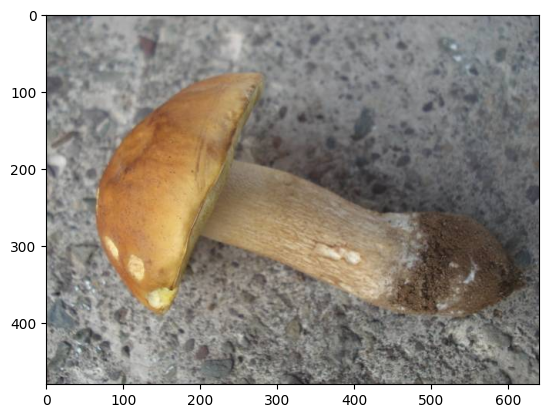

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show();

In [6]:
detections = sv.Detections.from_ultralytics(results)
detections

Detections(xyxy=array([[     64.293,      75.733,      281.86,      392.79]], dtype=float32), mask=None, confidence=array([    0.38313], dtype=float32), class_id=array([46]), tracker_id=None, data={'class_name': array(['banana'], dtype='<U6')})

In [7]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

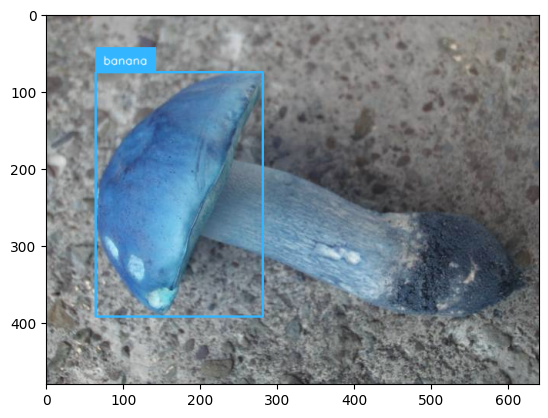

In [8]:
plt.imshow(annotated_image)
plt.show();

Essayons avec mon chat alors ! :D

In [15]:
image = cv2.imread("miaou.jpg")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


0: 640x480 1 person, 1 cat, 1 couch, 1 bed, 1 vase, 236.2ms
Speed: 4.0ms preprocess, 236.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


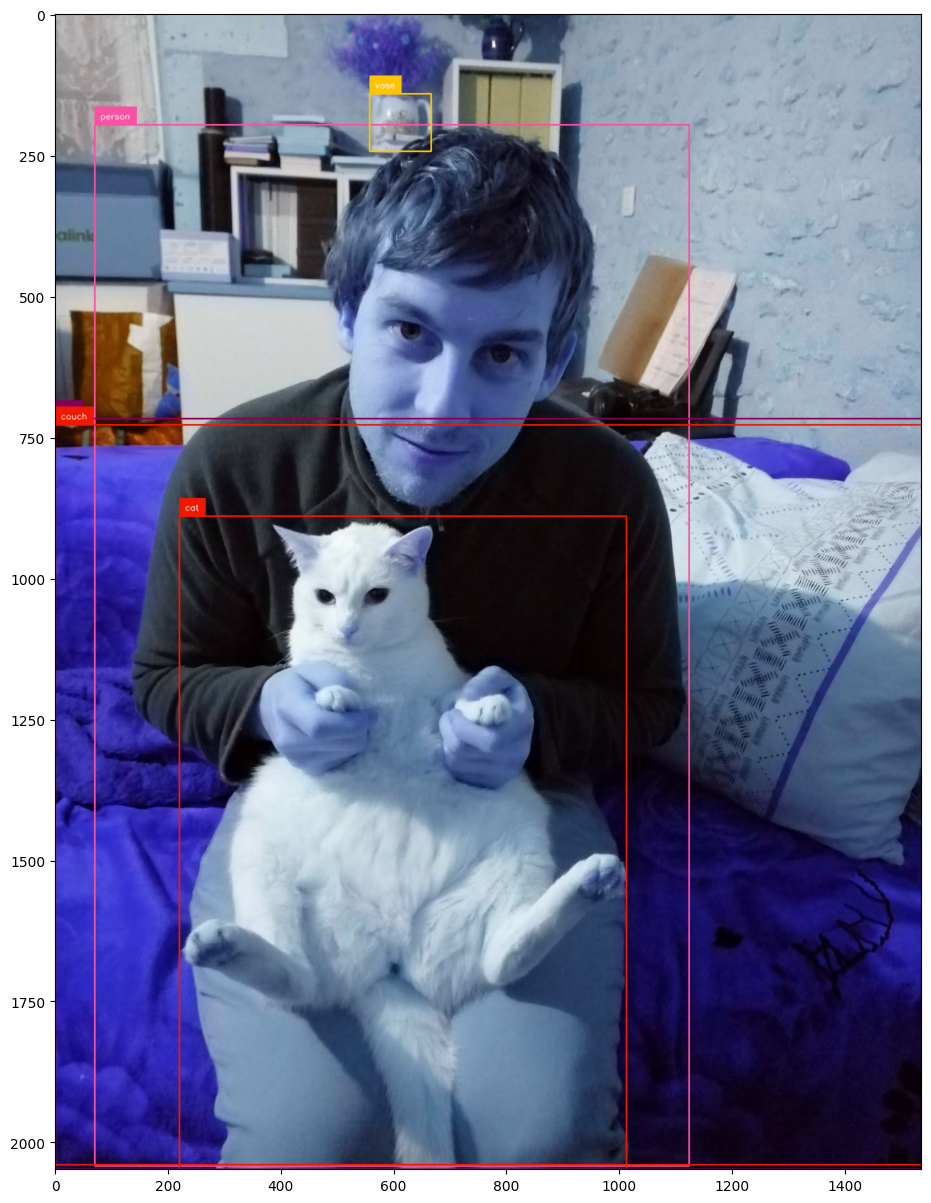

In [19]:
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

plt.figure(figsize=(20, 15))
plt.imshow(annotated_image)
plt.show();